## NAMA : DITA MARISA OKTARIANO
## NIM : 09011381722113
## KELAS : SK5U
## MATKUL : KECERDASAN BUATAN

### IDENTIFIKASI KUCING ATAU ANJING DENGAN MENGGUNAKAN METODE CNN
____

Dalam percobaan ini akan meggunakan keras untuk model yang digunakan adalah CNN (Convolutional Neutral Network).
Data set yang digunakan adalah berupa gambar dari kaggle.com dengan nama Dog Vs.cat. Jumlah gambar tersebut ada 25000 gambar untuk train dan 12500 gambar untuk test.

Convolutional Neural Network (CNN) adalah salah satu jenis neural network yang biasa digunakan pada data image. 

Tahapan dalam membuat CNN adalah:
1. convolution
2. pooling
3. flattening
4. full connection

# Import Library

In [34]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("dogs-vs-cats"))


['test1', 'train']


1. numpy berfungsi untuk melakukan operasi vektor dan matriks dengan mengelola array dan array multidimensi
2. pandas berfungsi untuk membaca atau menulis data
3. keras digunakan untuk mempredksi dengan benar dan untuk layer yang dibutuhkan untuk Neutral Network.
4. matpolip berfungsi untuk menampilkan gambar.

# Define Constants
Berfungsi untuk mengatur lebar dan tinggi gambar dalam satuan pixel.

In [35]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Menyiapkan Data Traning

In [36]:
filenames = os.listdir("dogs-vs-cats/train/")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [37]:
df.head()

,filename,category
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [38]:
df.tail()

,filename,category
24995,dog.9995.jpg,1
24996,dog.9996.jpg,1
24997,dog.9997.jpg,1
24998,dog.9998.jpg,1
24999,dog.9999.jpg,1


### Melihat Seluruh data

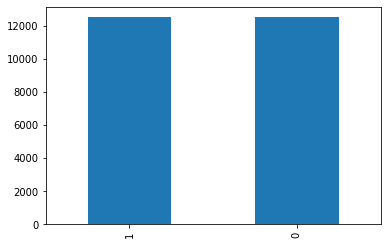

In [39]:
df['category'].value_counts().plot.bar()

From our data we have 12000 cats and 12000 dogs

# Melihat sample image

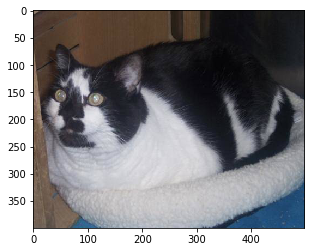

In [40]:
sample = random.choice(filenames)
image = load_img("dogs-vs-cats/train/"+sample)
plt.imshow(image)

# Membangun Model


Layer: 
1. Input Layer: Ini mewakili input data gambar. Ini akan membentuk kembali gambar menjadi array diminsion tunggal. Contoh gambar adalah 64x64 = 4096, itu akan dikonversi ke (4096,1) array.
2. Conv Layer: Lapisan ini akan mengekstraksi fitur dari gambar.
3. Pooling Layer: Lapisan ini mengurangi volume spasial dari gambar input setelah konvolusi.
4. Fully Connected Layer: Ini menghubungkan jaringan dari satu lapisan ke lapisan lain
5. Output Layer: Ini adalah layer nilai yang diprediksi.

Fungsi aktivasi yang digunakan :
1. fungsi 'Relu' : Rectified Linear Unit (ReLU) akan menghilangkan vanishing gradient dengan cara menerapkan fungsi aktivasi element sebagai f(x)=max⁡(0,x) alias aktivasi elemen akan dilakukan saat berada di ambang batas 0.
2. fungsi 'softmax' : Fungsi Softmax menghitung probabilitas dari setiap kelas target atas semua kelas target yang memungkinkan dan akan membantu untuk menentukan kelas target untuk input yang diberikan. Softmax digunakan karena ada 2 kelas yaitu kelas anjing dan kelas kucing.

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
__________

# Memanggil kembali

In [42]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Stop lebih awal**

untk mencegah over fitting, training akan dihentikan setelah 10 epoch dan val_loss tidak menurun

In [43]:
earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**

learning rate akabn dikurangi saat akurasi tidak meningkat untuk 2 step.

In [44]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [45]:
callbacks = [earlystop, learning_rate_reduction]

# Persiapan data

karena menggunakan image generator `with class_mode="categorical"`. Perlu dilakukan convert kategori kolom menjadi string. Imagenerator akan mengkonversikannya menjadi one-hot encoding.

jadi kita menkonversi 1 menjadi dog dan 0 menjadi cat

In [46]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [47]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

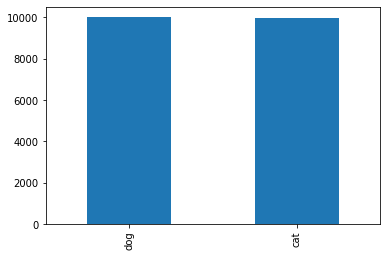

In [48]:
train_df['category'].value_counts().plot.bar()

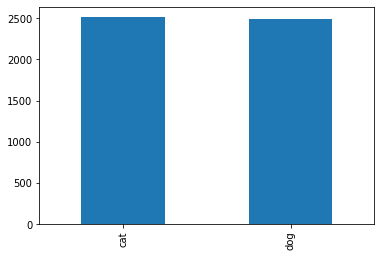

In [49]:
validate_df['category'].value_counts().plot.bar()

In [50]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Traning Generator

In [51]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


### Validation Generator

In [52]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


# bagaimana generator bekerja

In [53]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "dogs-vs-cats/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


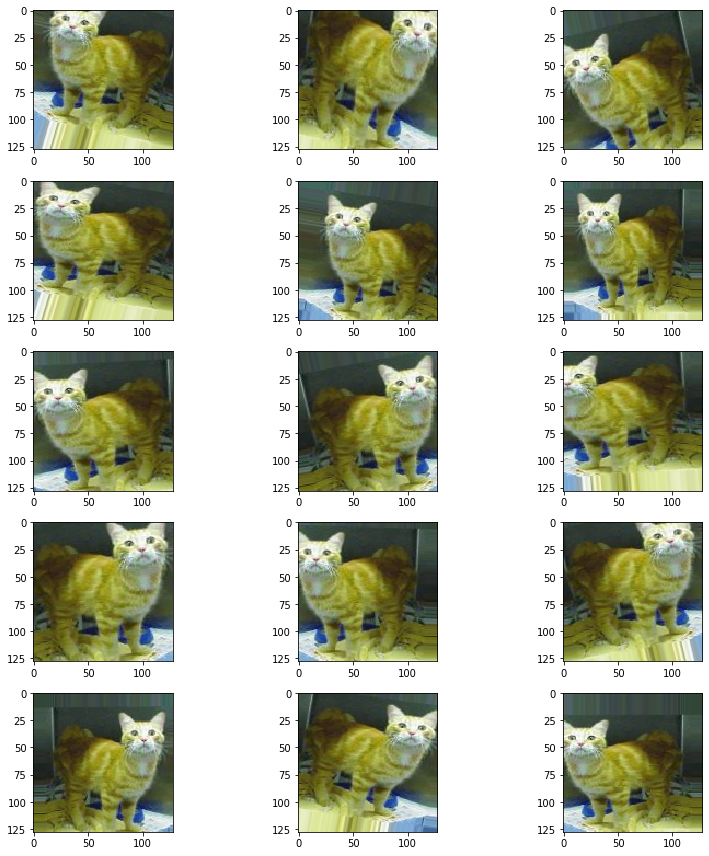

In [54]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fit Model

In [55]:
epochs=1 if FAST_RUN else 100
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/100
1333/1333 [==============================] - 135s 102ms/step - loss: 0.7385 - acc: 0.6344 - val_loss: 0.6169 - val_acc: 0.6388
Epoch 2/100
   3/1333 [..............................] - ETA: 1:16 - loss: 0.6520 - acc: 0.7111

C:\Users\FX505DY\Anaconda3\lib\site-packages\keras\callbacks.py:1109: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1333/1333 [==============================] - 134s 100ms/step - loss: 0.5605 - acc: 0.7192 - val_loss: 0.5558 - val_acc: 0.7139
Epoch 3/100
1333/1333 [==============================] - 134s 101ms/step - loss: 0.5075 - acc: 0.7575 - val_loss: 0.5871 - val_acc: 0.7452
Epoch 4/100
1333/1333 [==============================] - 135s 101ms/step - loss: 0.4690 - acc: 0.7843 - val_loss: 0.5242 - val_acc: 0.7507
Epoch 5/100
1333/1333 [==============================] - 143s 107ms/step - loss: 0.4368 - acc: 0.8030 - val_loss: 0.4165 - val_acc: 0.8140
Epoch 6/100
1333/1333 [==============================] - 133s 100ms/step - loss: 0.4171 - acc: 0.8140 - val_loss: 0.3913 - val_acc: 0.8164
Epoch 7/100
1333/1333 [==============================] - 133s 100ms/step - loss: 0.3988 - acc: 0.8205 - val_loss: 0.4126 - val_acc: 0.8183
Epoch 8/100
1333/1333 [==============================] - 131s 98ms/step - loss: 0.3880 - acc: 0.8283 - val_loss: 0.4327 - val_acc: 0.8243
Epoch 9/100
1333/1333 [=================

1333/1333 [==============================] - 131s 98ms/step - loss: 0.2439 - acc: 0.9004 - val_loss: 0.2124 - val_acc: 0.9192
Epoch 62/100
1333/1333 [==============================] - 131s 98ms/step - loss: 0.2474 - acc: 0.8990 - val_loss: 0.1908 - val_acc: 0.9256
Epoch 63/100
1333/1333 [==============================] - 131s 98ms/step - loss: 0.2464 - acc: 0.8990 - val_loss: 0.1993 - val_acc: 0.9282
Epoch 64/100
1333/1333 [==============================] - 132s 99ms/step - loss: 0.2511 - acc: 0.8970 - val_loss: 0.2404 - val_acc: 0.9137
Epoch 65/100
1333/1333 [==============================] - 131s 99ms/step - loss: 0.2433 - acc: 0.8996 - val_loss: 0.2160 - val_acc: 0.9053
Epoch 66/100
1333/1333 [==============================] - 132s 99ms/step - loss: 0.2443 - acc: 0.9031 - val_loss: 0.3341 - val_acc: 0.8778


Akurasi yang didapatkan adalah sebesar 87%

# Menyimpan Model

In [56]:
model.save_weights("model.h5")

# Virtualize Training

Menampilkan hasil training dalam bentuk grafik. grafik berupa loss dan akurasi

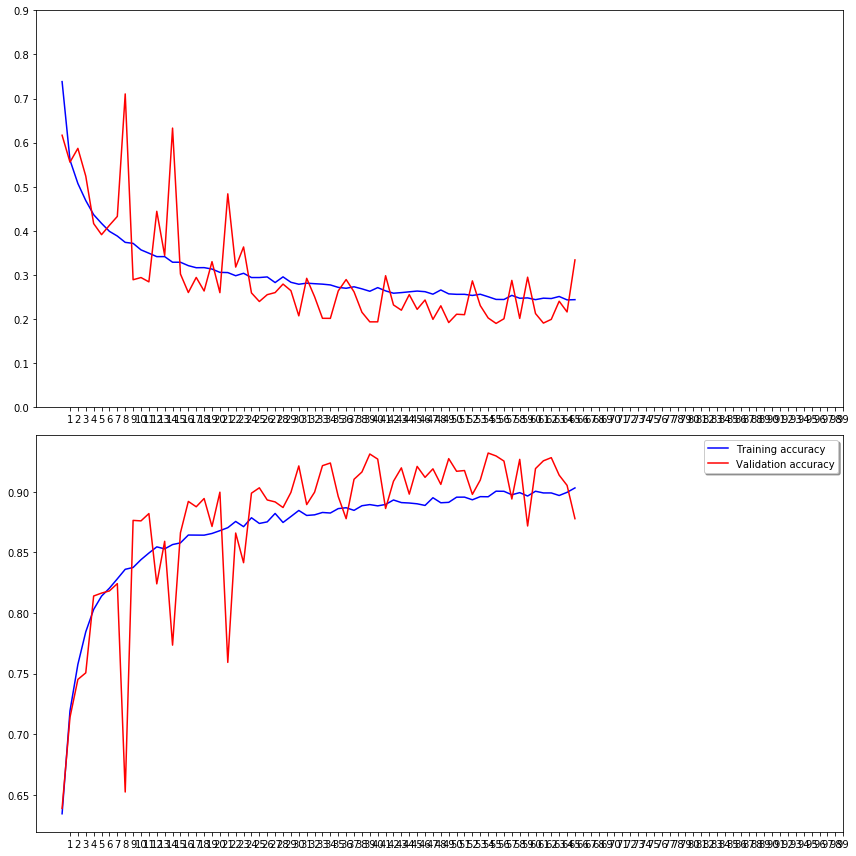

In [57]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Menyiapkan data Testing

In [58]:
test_filenames = os.listdir("dogs-vs-cats/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

# Membuat Testing Generator

In [59]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "dogs-vs-cats/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


# Prediksi

In [60]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

untuk klasifikasi kategori prediksi akan muncul dengan peluang dari setiap kategori. jadi, akan dipilih kategori yang memiliki peluang paling tinggi dengan rata-rata maksimal numpy.

In [61]:
test_df['category'] = np.argmax(predict, axis=-1)

kategori prediksi akan di konversi menjadi kelas generator dengan menggunakan `train_generator.class_indices`. 

In [62]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

dari data kita mengubah data menjadi `{1: 'dog', 0: 'cat'}`. jadi hasilnya anjing menjadi 1 dan kucing menjadi 0

In [63]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

### Virtaulize Result

Memvirtualsisasikan hasil menjadi sebuah grafik bar

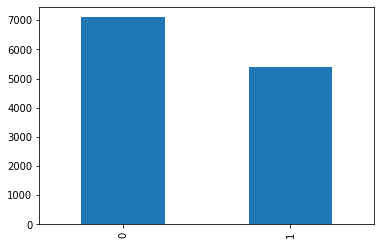

In [64]:
test_df['category'].value_counts().plot.bar()

### Melihat hasill prediksi dengan gambar

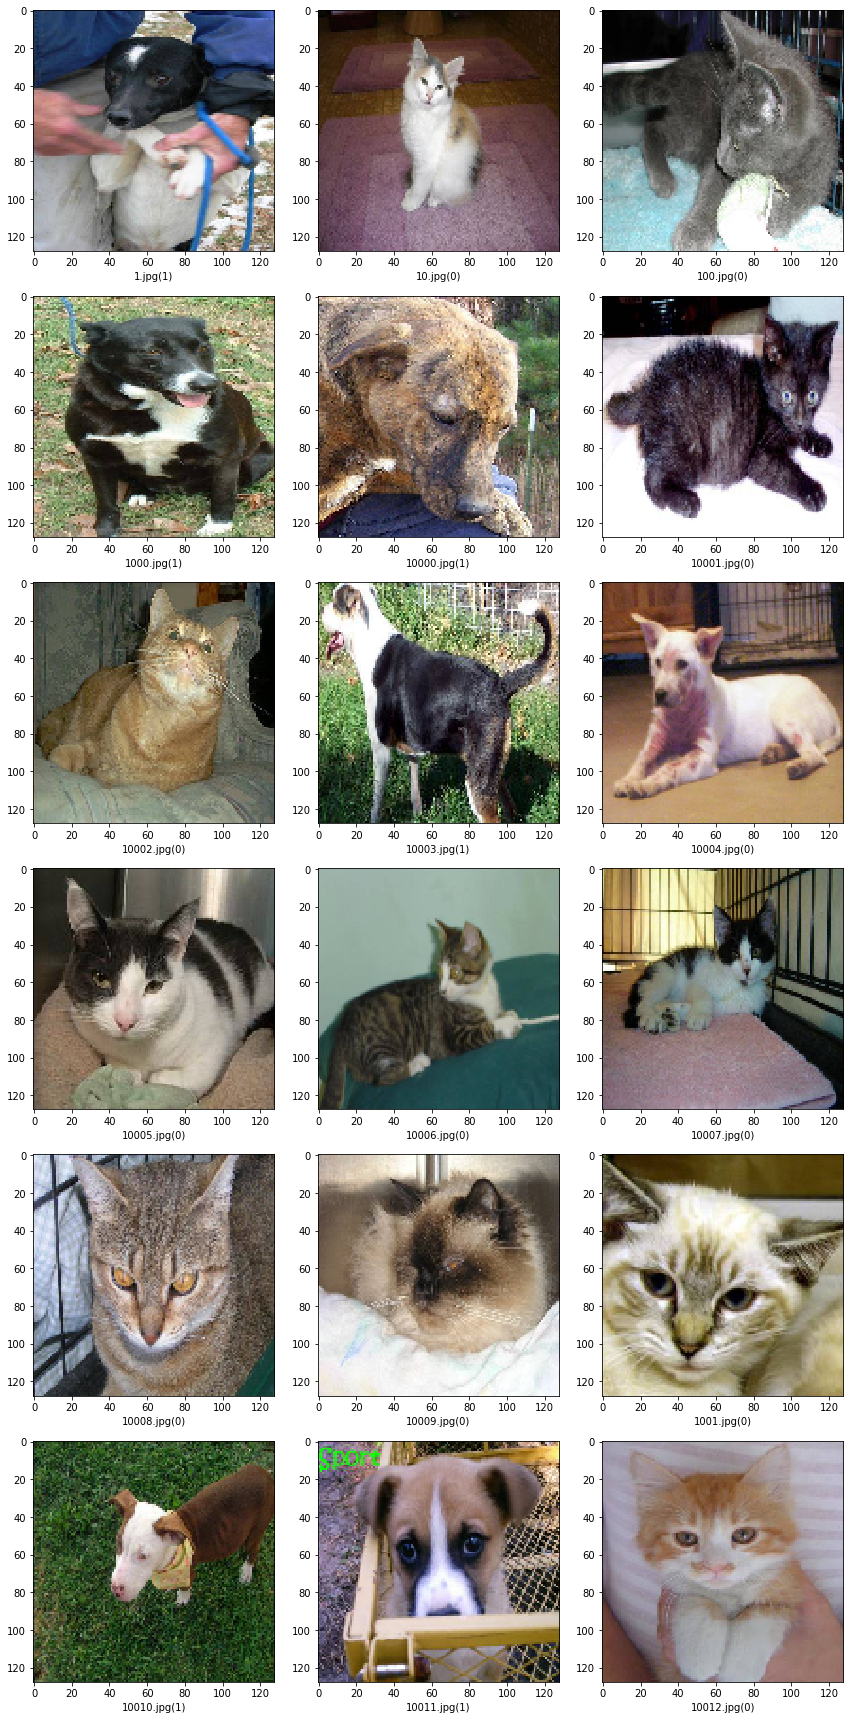

In [65]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("dogs-vs-cats/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

Bisa dilihat hasil yang didapatkan adalah jika gambar adalah anjing maka akan ditambah 1 di namanya, sedangkan jika gambar adalah kucing maka namanya akan ditambah dengan 0

# Submission

Tabel yang berisi hasil prediksi

In [66]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)